In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ad_clicks_csv = pd.read_csv('../Resources/network_ad_demographics.csv')
ad_clicks = ad_clicks_csv.drop('User ID',1)
ad_clicks

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [3]:
ad_clicks.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


Categorical Variables

In [4]:
categorical = [var for var in ad_clicks.columns if ad_clicks[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['Gender']


In [5]:
for var in categorical: 
   print(ad_clicks[var].value_counts())

Female    204
Male      196
Name: Gender, dtype: int64


In [6]:
for var in categorical: 
    print(ad_clicks[var].value_counts()/np.float(len(ad_clicks)))

Female    0.51
Male      0.49
Name: Gender, dtype: float64


In [7]:
ad_clicks['Purchased'].nunique()

2

In [8]:
ad_clicks['Purchased'].unique()

array([0, 1])

In [9]:
ad_clicks['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

Frequency Distribution of Ad Clicks - Purchased/Unpurchased

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


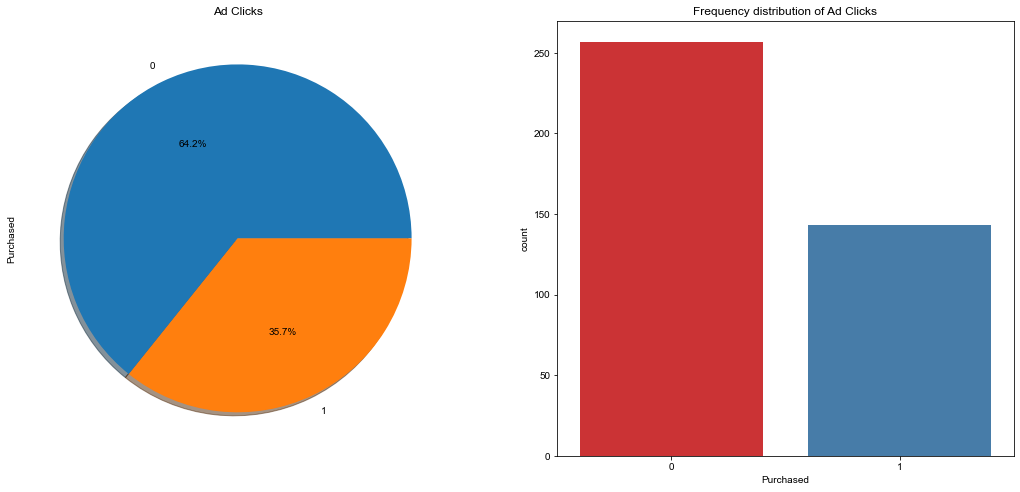

In [10]:
# visualize frequency distribution of Purchased/Unpurchased
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = ad_clicks['Purchased'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Ad Clicks')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Purchased", data=ad_clicks, palette="Set1")
ax[1].set_title("Frequency distribution of Ad Clicks")
sns.set(style='whitegrid')
plt.show()

Distribution of Ad Clicks by Gender - Purchased/Unpurchased

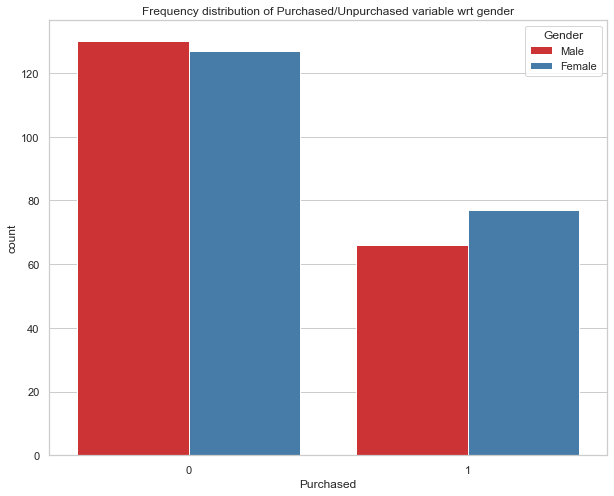

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Purchased", hue="Gender", data=ad_clicks, palette="Set1")
ax.set_title("Frequency distribution of Purchased/Unpurchased variable wrt gender")
plt.show()

Numerical Variables

In [12]:
numerical = [var for var in ad_clicks.columns if ad_clicks[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 3 numerical variables

The numerical variables are :

 ['Age', 'EstimatedSalary', 'Purchased']


In [13]:
ad_clicks[numerical].head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [14]:
ad_clicks['Age'].nunique()

43

Age Distribution

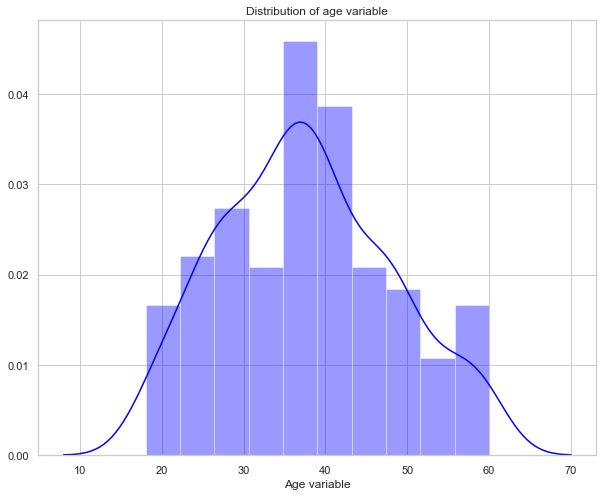

In [15]:
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['Age']
x = pd.Series(x, name="Age variable") #informative axis label 
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

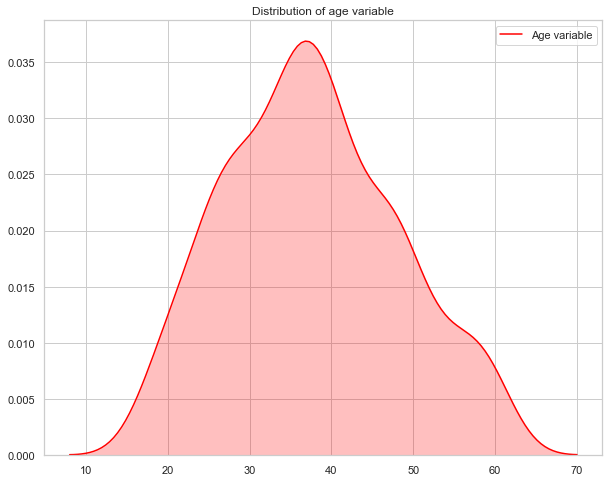

In [16]:
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable")
plt.show()

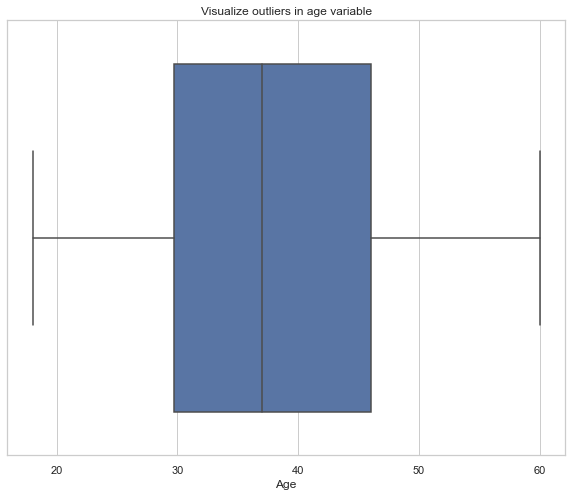

In [17]:
#Detect outliers
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['Age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

Age and Purchased/Unpurchased

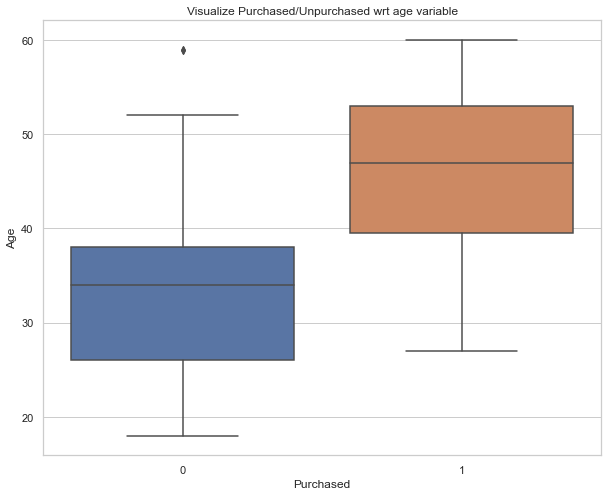

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="Age", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt age variable")
plt.show()

Age and Gender, Purchased/Unpurchased

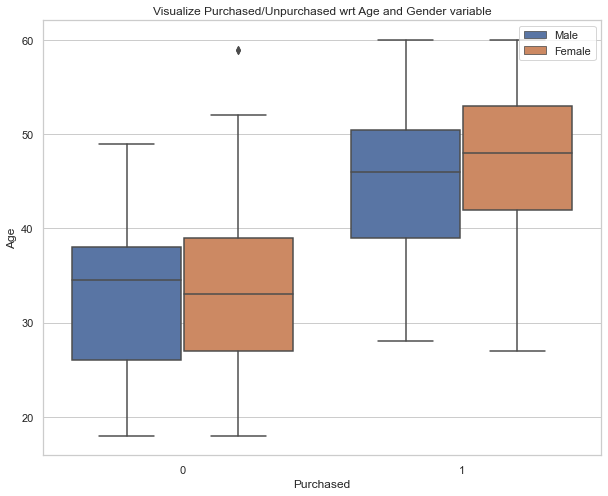

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="Age", hue="Gender", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Age and Gender variable")
ax.legend(loc='upper right')
plt.show()

Gender-Age Distribution, Purchased/Unpurchased

<Figure size 576x432 with 0 Axes>

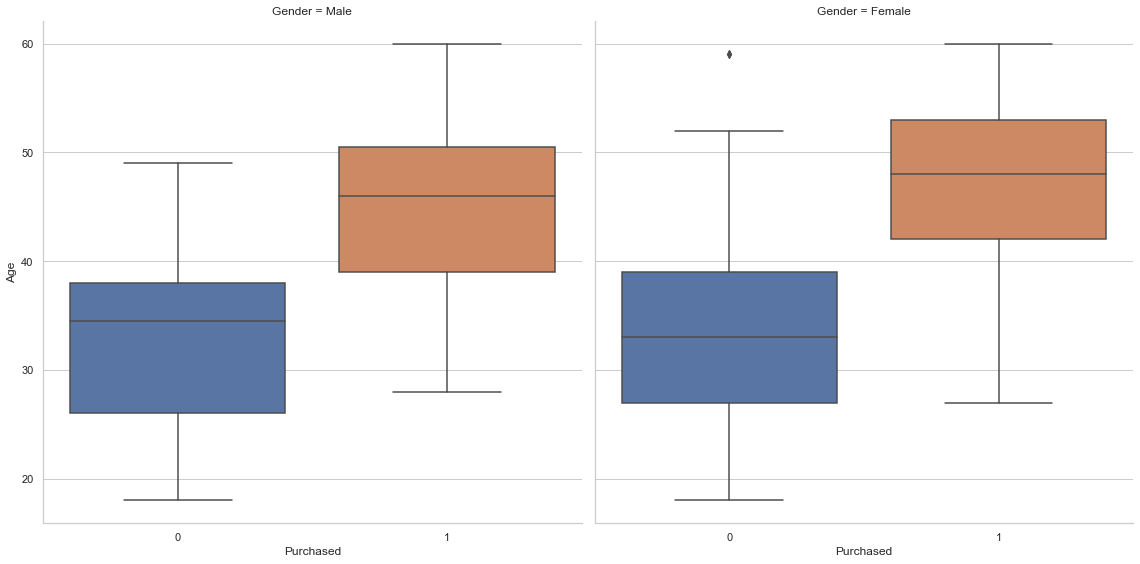

In [20]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="Age", col="Gender", data=ad_clicks, kind="box", height=8, aspect=1)
plt.show()

Salary Variable

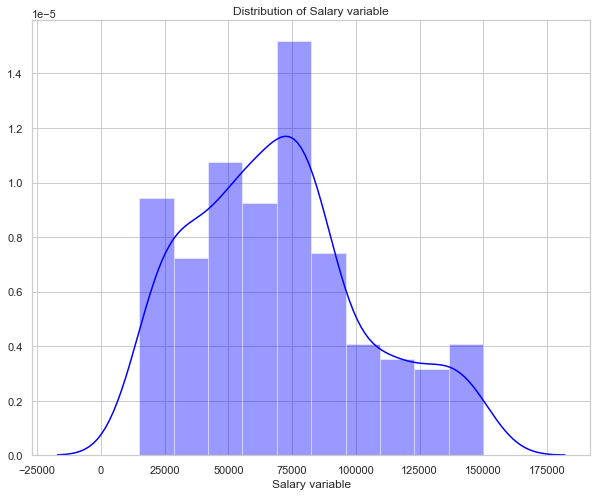

In [21]:
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['EstimatedSalary']
x = pd.Series(x, name="Salary variable") #informative axis label 
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of Salary variable")
plt.show()

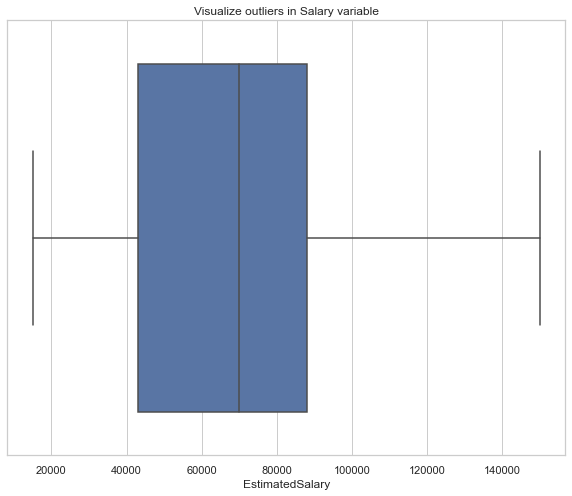

In [22]:
#Detect outliers
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['EstimatedSalary']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in Salary variable")
plt.show()

Salary, Purchased/Unpurchased

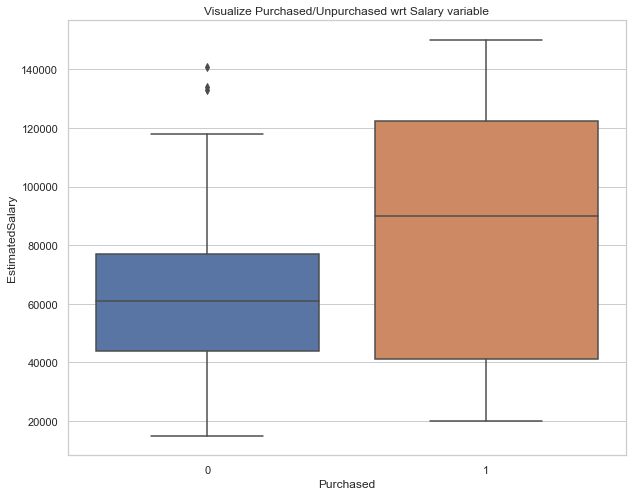

In [23]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="EstimatedSalary", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Salary variable")
plt.show()

Salary and Gender, Purchased/Unpurchased

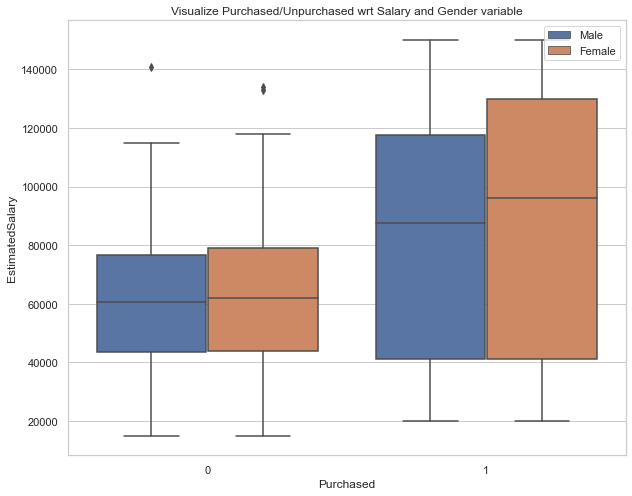

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="EstimatedSalary", hue="Gender", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Salary and Gender variable")
ax.legend(loc='upper right')
plt.show()

Salary-Gender Distribution, Purchased/Unpurchased

<Figure size 576x432 with 0 Axes>

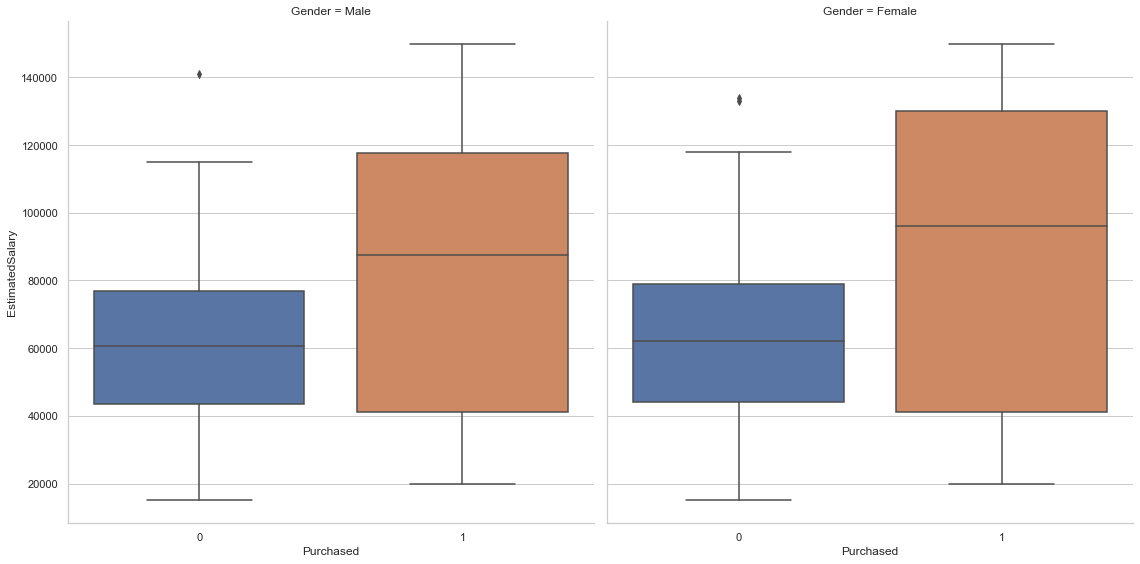

In [25]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="EstimatedSalary", col="Gender", data=ad_clicks, kind="box", height=8, aspect=1)
plt.show()

In [26]:
ad_clicks.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Age,EstimatedSalary,Purchased
Age,1.0,0.1552,0.6225
EstimatedSalary,0.1552,1.0,0.3621
Purchased,0.6225,0.3621,1.0


Target Age Distributions

In [27]:
ad_clicks

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [28]:
min_value = ad_clicks['Age'].min()
max_value = ad_clicks['Age'].max()
print(min_value, max_value)
age_bins_ar2 = np.linspace(min_value,max_value,5)
print(age_bins_ar2)

18 60
[18.  28.5 39.  49.5 60. ]


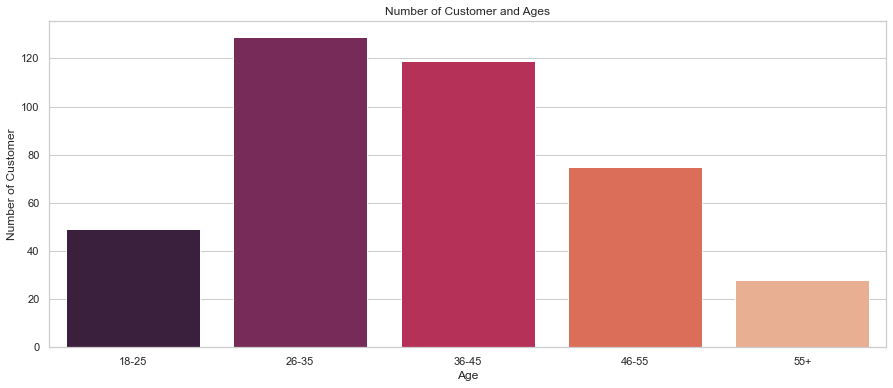

In [29]:
age18_25 = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18)]
age26_35 = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26)]
age36_45 = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36)]
age46_55 = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46)]
age55above = ad_clicks.loc[ad_clicks.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
y2= [(age18_25.values),(age26_35.values),(age36_45.values),(age46_55.values),(age55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [30]:
y_sum = sum(y)
y_array = np.asarray(y)
print(y_array)
perc_list = y_array/y_sum
print(perc_list)
perc_val = perc_list*100
print(perc_val)

[ 49 129 119  75  28]
[0.1225 0.3225 0.2975 0.1875 0.07  ]
[12.25 32.25 29.75 18.75  7.  ]


In [31]:
dict = {'Age Group': x, 'Total Count': y_array, 'Percentage of Users': perc_val}
age_df = pd.DataFrame(dict)
age_df.style.format({'Percentage of Users': '{0:.2f}%'.format,})

,Age Group,Total Count,Percentage of Users
0,18-25,49,12.25%
1,26-35,129,32.25%
2,36-45,119,29.75%
3,46-55,75,18.75%
4,55+,28,7.00%


Target Age Group, Gender Distribution 

In [32]:
#(Gender values converted to numerical binary) 0 = M
age18_25f = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 1)]
age18_25m = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 0)]

age26_35f = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 1)]
age26_35m = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 0)]

age36_45f = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 1)]
age36_45m = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 0)]

age46_55f = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 1)]
age46_55m = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 0)]

age55abovef = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 1)]
age55abovem = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 0)]

x =  ["18-25","26-35","36-45","46-55","55+"]
yf = [len(age18_25f.values),len(age26_35f.values),len(age36_45f.values),len(age46_55f.values),len(age55abovef.values)]
ym = [len(age18_25m.values),len(age26_35m.values),len(age36_45m.values),len(age46_55m.values),len(age55abovem.values)]

dict2 = {'Age Group': x, 'Female Count': yf, 'Male Count':ym}
age_gender_df = pd.DataFrame(dict2)
age_gender_df 

,Age Group,Female Count,Male Count
0,18-25,0,0
1,26-35,0,0
2,36-45,0,0
3,46-55,0,0
4,55+,0,0


#Calculate Age Group - Gender Subarray ; Purchased/Unpurchased (repeat charts)

Target Estimated Salary Distribution

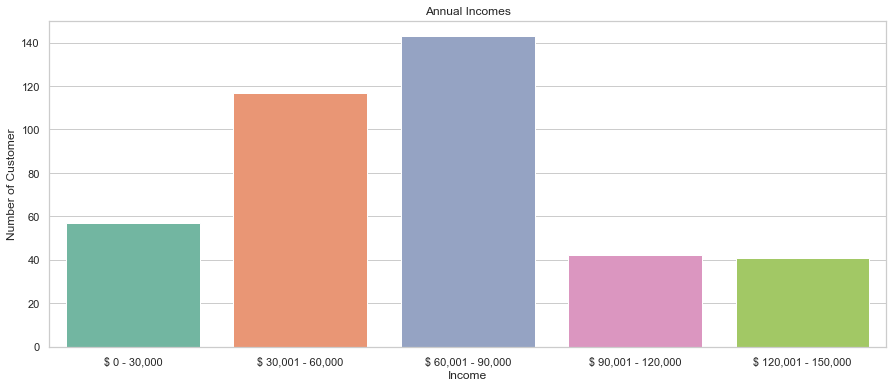

In [33]:
es0_30 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000)]
es31_60 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000)]
es61_90 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000)]
es91_120 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000)]
es121_150 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000)]

esx = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
esy = [len(es0_30.values), len(es31_60.values), len(es61_90.values), len(es91_120.values), len(es121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=esx, y=esy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [34]:
esy_sum = sum(esy)
esy_array = np.asarray(esy)
print(esy_array)
esperc_list = esy_array/esy_sum
print(esperc_list)
esperc_val = esperc_list*100
print(esperc_val)

[ 57 117 143  42  41]
[0.1425 0.2925 0.3575 0.105  0.1025]
[14.25 29.25 35.75 10.5  10.25]


In [35]:
dict = {'Salary Group': esx, 'Total Count': esy_array, 'Percentage of Users': esperc_val}
salary_df = pd.DataFrame(dict)
salary_df.style.format({'Percentage of Users': '{0:.2f}%'.format,})

,Salary Group,Total Count,Percentage of Users
0,"$ 0 - 30,000",57,14.25%
1,"$ 30,001 - 60,000",117,29.25%
2,"$ 60,001 - 90,000",143,35.75%
3,"$ 90,001 - 120,000",42,10.50%
4,"$ 120,001 - 150,000",41,10.25%


#Calculate Salary Group - Gender Subarray ; Purchased/Unpurchased 

Ex: representative percentage of purchased if white woman aged 31 with salary of 37k

In [36]:
#predictive percentage of purchased if white woman aged 31 with salary of 37k
gender_selection = ad_clicks.loc[ad_clicks['Gender'] == 'Female']
age_selection = gender_selection.loc[gender_selection['Age'] == 31]
count_selection = age_selection.loc[age_selection['Purchased'] == 0]
sel_count = count_selection['Purchased'].count()
total = ad_clicks['Purchased'].count()
perc = sel_count/total*100
print(f"Predictive purchase percentage of F/31/37K is {perc}%")
#not correct as this only accounts for sample 

Predictive purchase percentage of F/31/37K is 1.25%


Groupby Gender, Purchased

In [37]:
multi = ad_clicks.groupby(['Purchased', 'Gender']).agg({'Age': ['count'], 'EstimatedSalary':['mean'] })
multi_fill = multi.fillna(0)
multi_fill

Age EstimatedSalary
                 count            mean
Purchased Gender                      
0         Female   127    61480.314961
          Male     130    59630.769231
1         Female    77    88714.285714
          Male      66    83424.242424

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

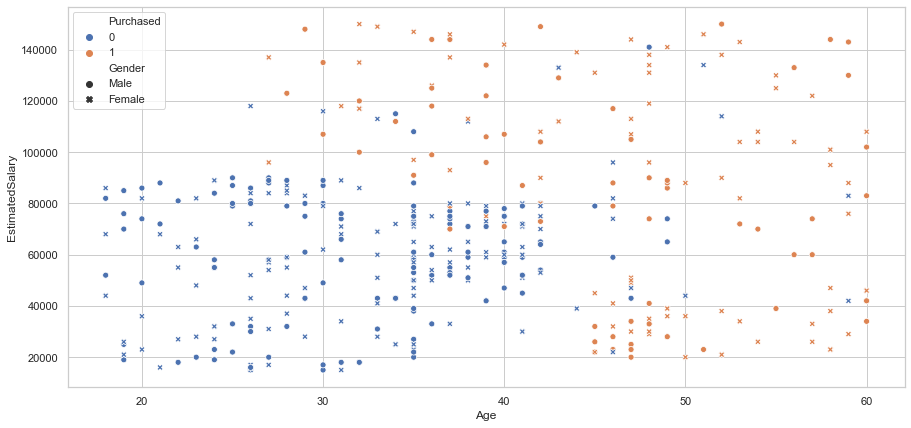

In [38]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=ad_clicks,x='Age',y='EstimatedSalary',hue='Purchased',style='Gender')

Descriptive Analysis

In [39]:
ad_clicks.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [40]:
ad_clicks2 = ad_clicks
ad_clicks2['Gender'] = ad_clicks2['Gender'].map({"Male":0, "Female":1})
ad_clicks2

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [41]:
ad_clicks2.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,400.0,0.5100,0.500526,0.0,0.00,1.0,1.0,1.0
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


Binary Logistic Regression

In [42]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(ad_clicks2, test_size=.3, random_state=42)

In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

formula = ('Purchased ~ Age + EstimatedSalary + Gender')
model = logit(formula=formula, data=train_data).fit()

Optimization terminated successfully.
         Current function value: 0.371980
         Iterations 7


Model Summary

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 Nov 2021   Pseudo R-squ.:                  0.4214
Time:                        23:43:50   Log-Likelihood:                -104.15
converged:                       True   LL-Null:                       -180.02
Covariance Type:            nonrobust   LLR p-value:                 1.120e-32
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -10.8977      1.325     -8.223      0.000     -13.495      -8.300
Age                 0.2004      0.027      7.447      0.000       0.148       0.253
EstimatedSalary  3.335e-05   5.92e-06      5.632      0.000    2.17e-05     4.5e-05
Gender             -0.2801      0.351     -0.798      0.425      -0.968       0.408
===================================================================================
"""

The coefficient scores show that Age and Estimated Salary have a significant influence on Purchased/UnPurchased (p-values <0.05). <br><br>
Method Used: Maximum Likelihood Estimation. (MLE)

Marginal Effects Computation 

In [45]:
AME = model.get_margeff(at='overall', method='dydx')
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:              Purchased
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.0238      0.002     13.510      0.000       0.020       0.027
EstimatedSalary  3.962e-06   5.35e-07      7.399      0.000    2.91e-06    5.01e-06
Gender             -0.0333      0.042     -0.801      0.423      -0.115       0.048


Confusion Matrix

In [46]:
import numpy as np 
from sklearn.metrics import classification_report, accuracy_score

prediction = model.predict(exog= test_data)
cutoff =.5
y_prediction = np.where(prediction> cutoff,1,0)
y_actual = test_data['Purchased']

conf_matrix = pd.crosstab(y_actual, y_prediction, rownames= ["Actual"], colnames=['Predicted'], margins=True)

print(conf_matrix)

Predicted   0   1  All
Actual                
0          71   2   73
1          15  32   47
All        86  34  120


Of 120 test values(30%) the trained model classified 71/73(94%) Purchased, and 32/47(68%) Not Purchased accurately.

Classification Accuracy

In [47]:
accuracy = accuracy_score(y_actual, y_prediction)
print('Prediction Accuracy: %.2f' % accuracy + "%")

Prediction Accuracy: 0.86%


Classification Report

In [48]:
print(classification_report(y_actual, y_prediction))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120



K-Means Optimal Clusters - WCSS

In [49]:
test = ad_clicks.iloc[:,1:]
test.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


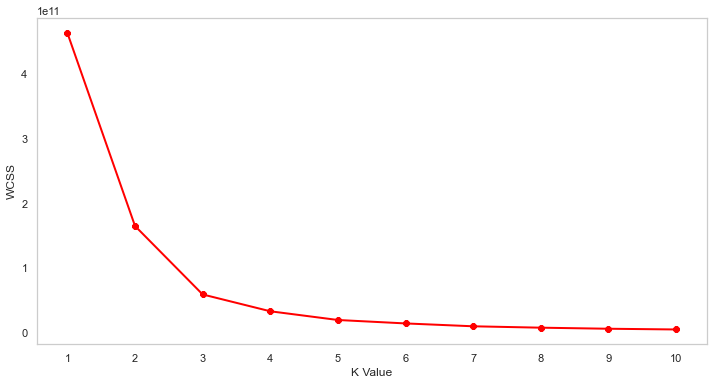

In [50]:
from sklearn.cluster import KMeans
X2=ad_clicks[["Age","EstimatedSalary","Purchased"]]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(ad_clicks.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

k-value determined to be 3 using the elbow method

K-Means Clustering POC

In [51]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(ad_clicks.iloc[:,1:]) #fit and assign
ad_clicks["label"] = clusters #labels to column
ad_clicks.head()

,Gender,Age,EstimatedSalary,Purchased,label
0,0,19,19000,0,0
1,0,35,20000,0,0
2,1,26,43000,0,0
3,1,27,57000,0,1
4,0,19,76000,0,1


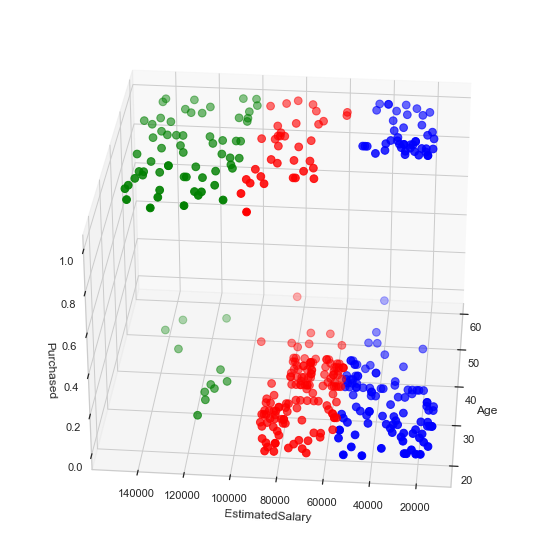

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ad_clicks.Age[ad_clicks.label == 0], ad_clicks["EstimatedSalary"][ad_clicks.label == 0], ad_clicks["Purchased"][ad_clicks.label == 0], c='blue', s=60)
ax.scatter(ad_clicks.Age[ad_clicks.label == 1], ad_clicks["EstimatedSalary"][ad_clicks.label == 1], ad_clicks["Purchased"][ad_clicks.label == 1], c='red', s=60)
ax.scatter(ad_clicks.Age[ad_clicks.label == 2], ad_clicks["EstimatedSalary"][ad_clicks.label == 2], ad_clicks["Purchased"][ad_clicks.label == 2], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
ax.set_zlabel('Purchased')
plt.show()

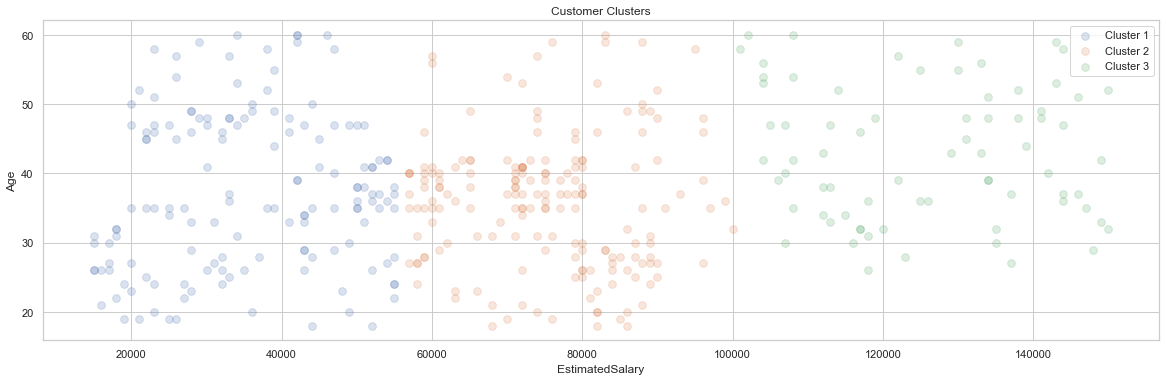

In [53]:
# Plot distributions
plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);
plt.scatter(ad_clicks[ad_clicks.label == 0].loc[:,'EstimatedSalary'], ad_clicks[ad_clicks.label == 0].loc[:,'Age'], s= 60, cmap='rainbow', label = 'Cluster 1', alpha=0.2)
plt.scatter(ad_clicks[ad_clicks.label == 1].loc[:,'EstimatedSalary'], ad_clicks[ad_clicks.label  == 1].loc[:,'Age'], s= 60, cmap='rainbow', label = 'Cluster 2', alpha=0.2)
plt.scatter(ad_clicks[ad_clicks.label == 2].loc[:,'EstimatedSalary'], ad_clicks[ad_clicks.label  == 2].loc[:,'Age'], s= 60, cmap='rainbow', label = 'Cluster 3', alpha=0.2)
#plt.xticks(np.arange(0, 10, 1)) 
#plt.yticks(np.arange(0, 100, 10))
axes = plt.gca()
#axes.set_xlim(0, 500)
#axes.set_ylim(0, 10000)
plt.title('Customer Clusters')
plt.xlabel('EstimatedSalary')
plt.ylabel('Age')
plt.legend()

Determining Clusters & Sub-Clusters from Model<br>
<p>Determined 3 optimal clusters to be of Salary Range each with 2 subclusters of Purchased/Unpurchased.

Determing Purchasing Distribution of Sub-Groups

<Figure size 576x432 with 0 Axes>

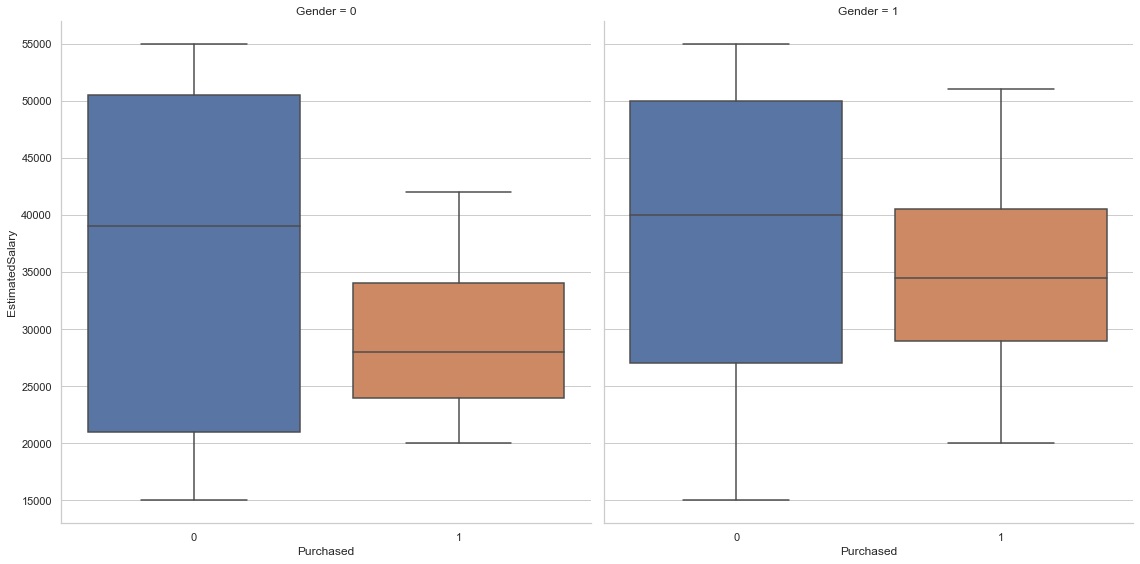

In [54]:
#"Gender/Purchase Analysis for Target Salary Range 15K-55K"
cluster_1 = ad_clicks.loc[ad_clicks['label'] == 0]

plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="EstimatedSalary", col="Gender", data=cluster_1, kind="box", height=8, aspect=1)
plt.show()

Cluster 1 Pairwise Distributions ("15k-55K") Purchased

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(bou

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Gender', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Age'>,
        <AxesSubplot:xlabel='label', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Gender'>,
        <AxesSubplot:xlabel='label', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='label', ylabel='EstimatedSalary'>],
       [<AxesSubplot:xlabel='Age', ylabel='Purchased'>,
        <AxesSubplot:xlabel='Gender', ylabel='P

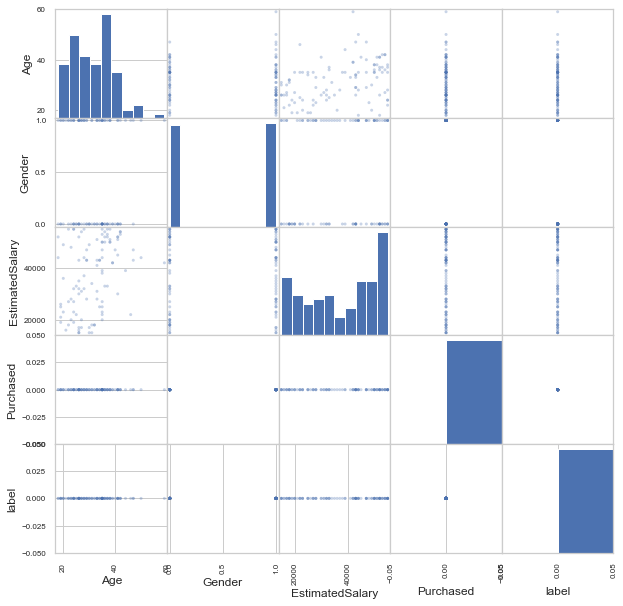

In [55]:
from pandas.plotting import scatter_matrix

cluster_1_p = cluster_1.loc[cluster_1["Purchased"] == 0]

sm1p = scatter_matrix(cluster_1_p[['Age', 'Gender','EstimatedSalary', 'Purchased', 'label']],
    alpha=0.3, figsize=(10,10))
sm1p

Cluster 1 Pairwise Distributions ("15k-55K") Not Purchased

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Gender', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Age'>,
        <AxesSubplot:xlabel='label', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Gender'>,
        <AxesSubplot:xlabel='label', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='label', ylabel='EstimatedSalary'>],
       [<AxesSubplot:xlabel='Age', ylabel='Purchased'>,
        <AxesSubplot:xlabel='Gender', ylabel='P

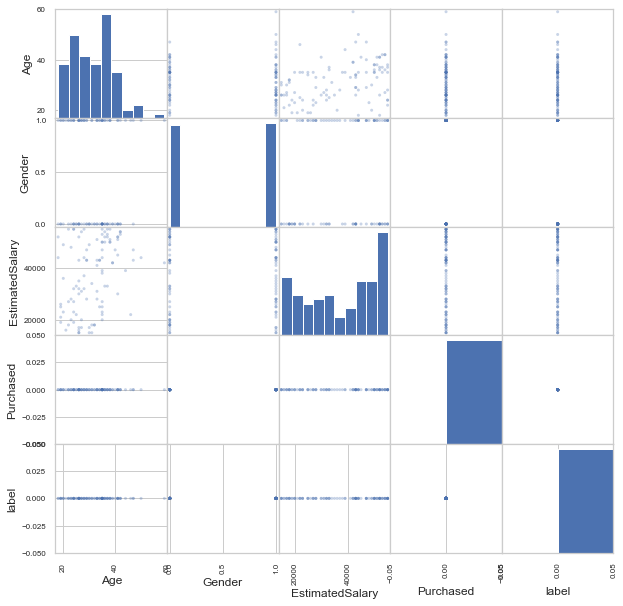

In [56]:
cluster_1_np = cluster_1.loc[cluster_1["Purchased"] == 0]

sm1np = scatter_matrix(cluster_1_np[['Age', 'Gender','EstimatedSalary', 'Purchased', 'label']],
    alpha=0.3, figsize=(10,10))
sm1np

<Figure size 576x432 with 0 Axes>

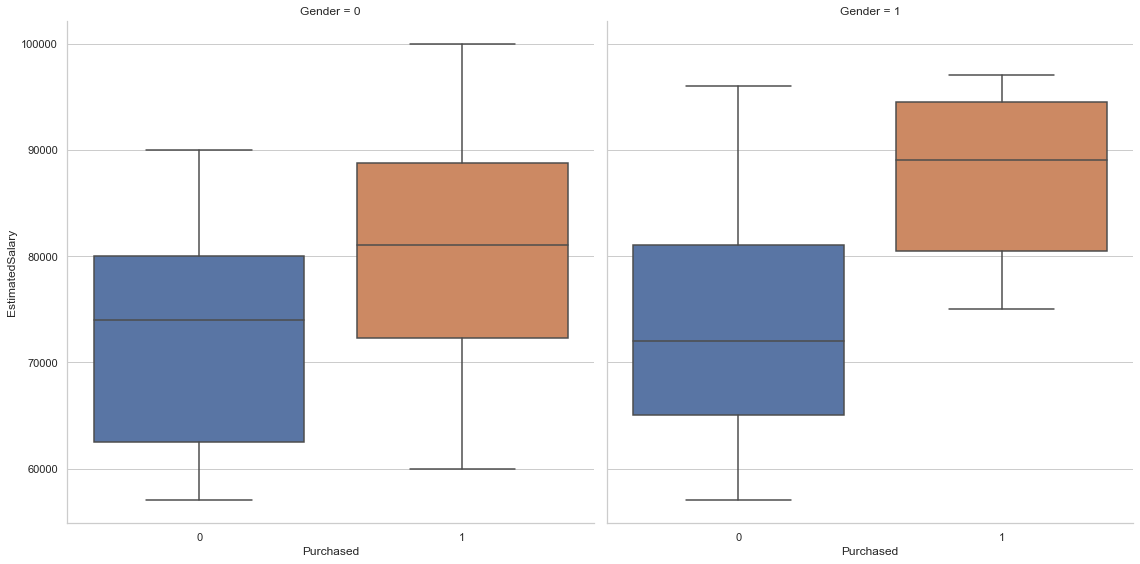

In [57]:
#"Gender/Purchase Analysis for Target Salary Range 55K-100K"
cluster_3 = ad_clicks.loc[ad_clicks['label'] == 1]

plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="EstimatedSalary", col="Gender", data=cluster_3, kind="box", height=8, aspect=1)
plt.show()

Cluster 3 Pairwise Distributions ("55k-100K") Purchased

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(bou

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Gender', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Age'>,
        <AxesSubplot:xlabel='label', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Gender'>,
        <AxesSubplot:xlabel='label', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='label', ylabel='EstimatedSalary'>],
       [<AxesSubplot:xlabel='Age', ylabel='Purchased'>,
        <AxesSubplot:xlabel='Gender', ylabel='P

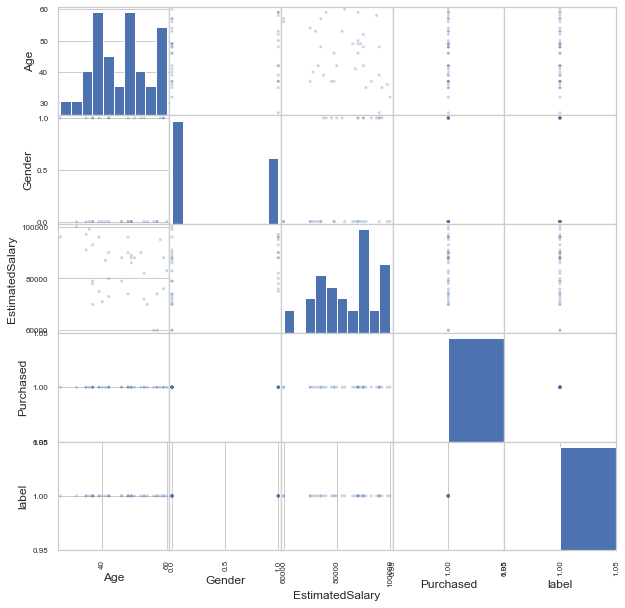

In [58]:
cluster_3_p = cluster_3.loc[cluster_3["Purchased"] == 1]

sm3p = scatter_matrix(cluster_3_p[['Age', 'Gender','EstimatedSalary', 'Purchased', 'label']],
    alpha=0.3, figsize=(10,10))
sm3p

Cluster 3 Pairwise Distributions ("55k-100K") Purchased

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Gender', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Age'>,
        <AxesSubplot:xlabel='label', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Gender'>,
        <AxesSubplot:xlabel='label', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='label', ylabel='EstimatedSalary'>],
       [<AxesSubplot:xlabel='Age', ylabel='Purchased'>,
        <AxesSubplot:xlabel='Gender', ylabel='P

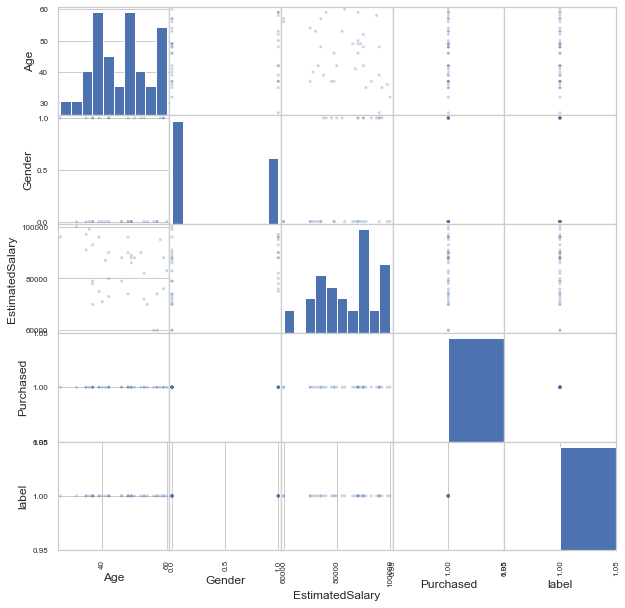

In [59]:
cluster_3_np = cluster_3.loc[cluster_3["Purchased"] == 1]

sm3np = scatter_matrix(cluster_3_np[['Age', 'Gender','EstimatedSalary', 'Purchased', 'label']],
    alpha=0.3, figsize=(10,10))
sm3np

<Figure size 576x432 with 0 Axes>

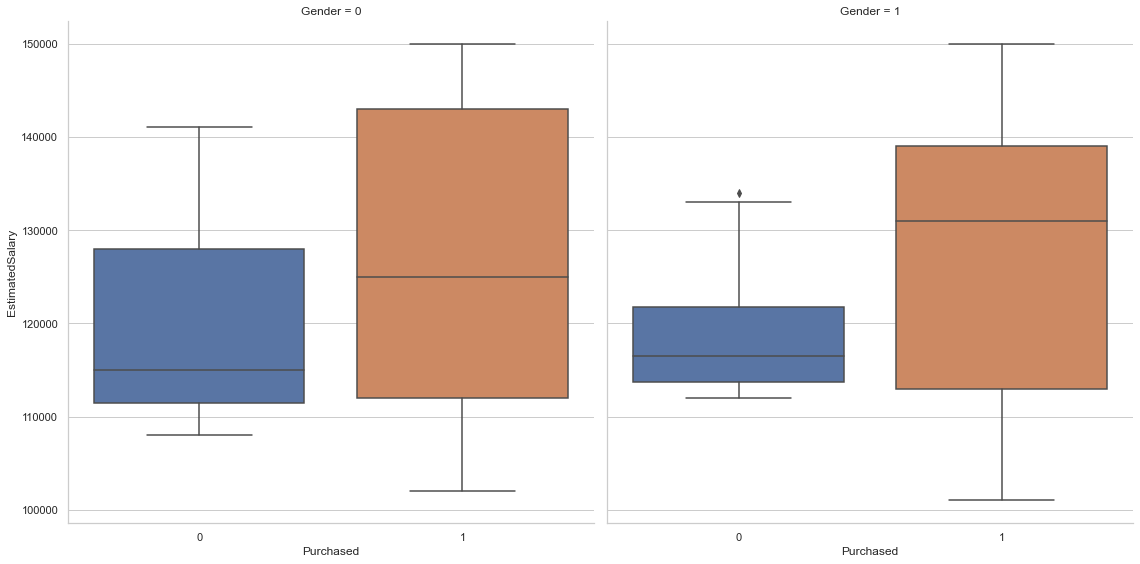

In [60]:
#"Gender/Purchase Analysis for Target Salary Range 100K-150K"
cluster_2 = ad_clicks.loc[ad_clicks['label'] == 2]

plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="EstimatedSalary", col="Gender", data=cluster_2, kind="box", height=8, aspect=1)
plt.show()

Cluster 2 Pairwise Distributions ("100k-150K") Purchased

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 2.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(bou

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Gender', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Age'>,
        <AxesSubplot:xlabel='label', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Gender'>,
        <AxesSubplot:xlabel='label', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='label', ylabel='EstimatedSalary'>],
       [<AxesSubplot:xlabel='Age', ylabel='Purchased'>,
        <AxesSubplot:xlabel='Gender', ylabel='P

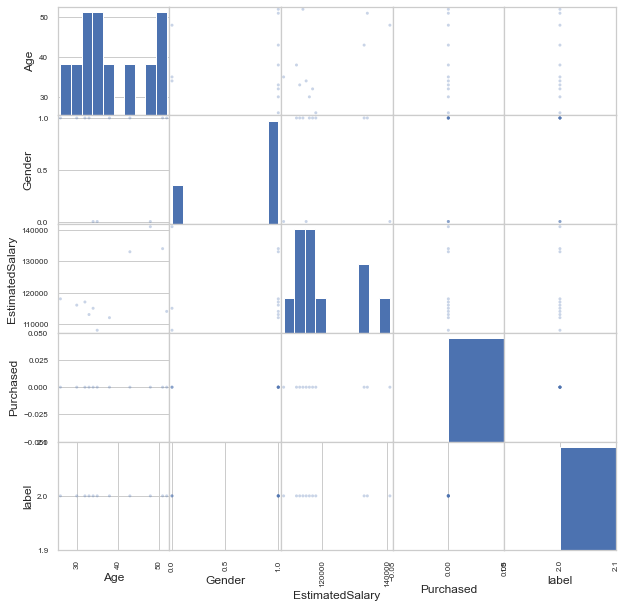

In [61]:
cluster_2_p = cluster_2.loc[cluster_2["Purchased"] == 0]

sm2p = scatter_matrix(cluster_2_p[['Age', 'Gender','EstimatedSalary', 'Purchased', 'label']],
    alpha=0.3, figsize=(10,10))
sm2p

Cluster 2 Pairwise Distributions ("100k-150K") Not Purchased

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Gender', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Age'>,
        <AxesSubplot:xlabel='label', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Gender'>,
        <AxesSubplot:xlabel='label', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='label', ylabel='EstimatedSalary'>],
       [<AxesSubplot:xlabel='Age', ylabel='Purchased'>,
        <AxesSubplot:xlabel='Gender', ylabel='P

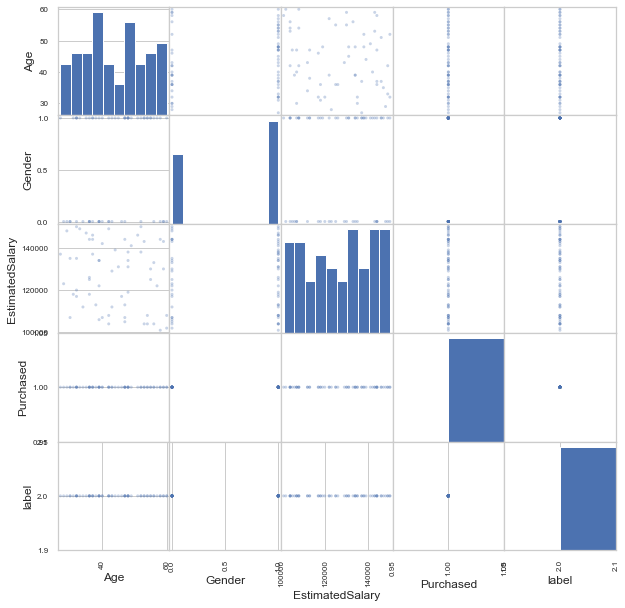

In [62]:
cluster_2_np = cluster_2.loc[cluster_2["Purchased"] == 1]

sm2np = scatter_matrix(cluster_2_np[['Age', 'Gender','EstimatedSalary', 'Purchased', 'label']],
    alpha=0.3, figsize=(10,10))
sm2np